# Detecting circles

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

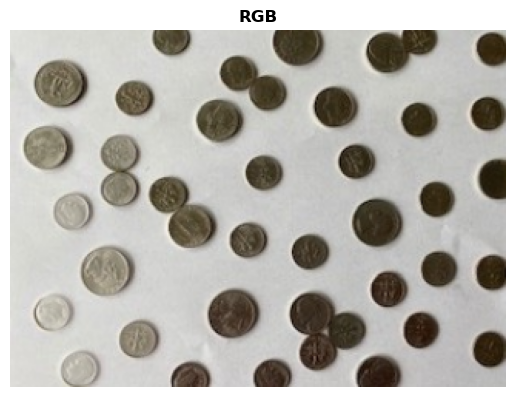

In [2]:
coins = cv2.imread("./images/change.png")
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)

plt.imshow(coins)
plt.axis('off')
plt.title("RGB")
plt.show()

We will compute the value of the change in the image coins. First let's find the positions of the coins using the [HoughCircles()](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d) function. Using this function, circles will be detected with radii in the range specified by the minRadius and maxRadius parameters. All of these radii are between 6 and 20 pixels. Like other detection techniques, we can tune the circle detection parameters.

In [3]:
coins_grayscale = cv2.cvtColor(coins, cv2.COLOR_RGB2GRAY)
circles = cv2.HoughCircles(image=coins_grayscale, method=cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=300, param2=15, minRadius=6, maxRadius=20).astype(np.uint16)

We can visualize the detected circles using the [circle()](https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670) function.

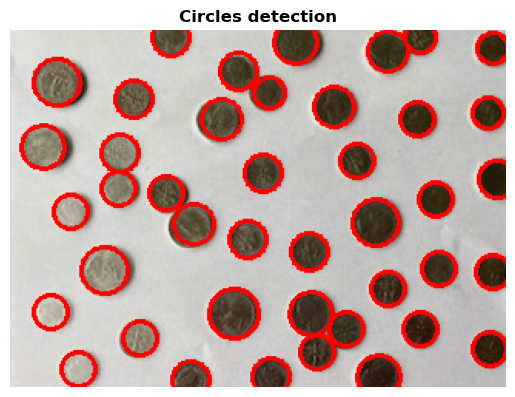

In [4]:
coins_circles = coins.copy()
for i in circles[0, :]:
    center = (i[0], i[1])
    radius = i[2]
    cv2.circle(coins_circles, center, radius, (255, 0, 0), 2)

plt.imshow(coins_circles)
plt.axis('off')
plt.title('Circles detection')
plt.show()

Now that we have found all the coins, we can classify them and compute the total value. The dimes are the smallest with diameters of less than 13 pixels.To evaluate whether or not 13 pixels is the right radii cutoff for dimes, we can visualize the corresponding circles.

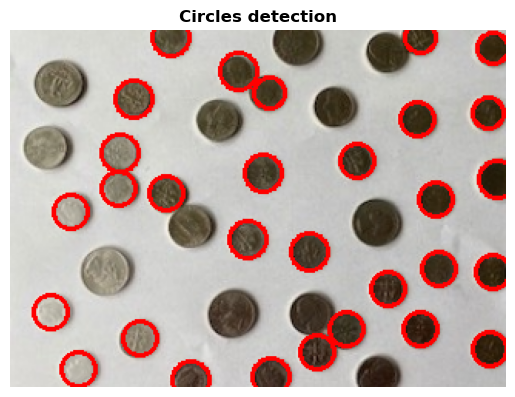

In [5]:
coins_dimes = coins.copy()
number_dimes = 0
for i in circles[0, :]:
    center = (i[0], i[1])
    radius = i[2]
    if radius < 13:
        number_dimes += 1
        cv2.circle(coins_dimes, center, radius, (255, 0, 0), 2)

plt.imshow(coins_dimes)
plt.axis('off')
plt.title('Circles detection')
plt.show()

We can also compute the total value of the dimes by counting them and multiplying the result by 0.1, the value of a dime in USD.

In [6]:
value_dimes = number_dimes * 0.1

print(f"Total value of the dimes = ${value_dimes:.2f}")

Total value of the dimes = $3.00
